#📌 Extracão

In [1]:
import pandas as pd
import requests


url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"


try:
    response = requests.get(url)
    response.raise_for_status()

    df = pd.read_json(response.text)


    print("Dados carregados com sucesso! Amostra dos dados:")
    print(df.head())


    print("\nInformações sobre o DataFrame:")
    df.info()

except requests.exceptions.RequestException as e:
    print(f"Erro ao acessar a API: {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")



/tmp/ipython-input-2520839897.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(response.text)


Dados carregados com sucesso! Amostra dos dados:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'Internet

#🔧 Transformação

In [12]:
import pandas as pd
import numpy as np
import requests
import json
from io import StringIO

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

try:
    response = requests.get(url)
    response.raise_for_status()

    data = json.loads(response.text)

    df = pd.json_normalize(data)
    print("--- Dados Carregados e Normalizados ---\n")


    df.columns = df.columns.str.replace('customer.', '', regex=False)
    df.columns = df.columns.str.replace('phone.', '', regex=False)
    df.columns = df.columns.str.replace('internet.', '', regex=False)
    df.columns = df.columns.str.replace('account.', '', regex=False)
    df.columns = df.columns.str.replace('Charges.', '', regex=False)
    print("Nomes das colunas foram limpos e simplificados.")
    print("Colunas resultantes:", df.columns.tolist())
    print("\n")

    print("--- Iniciando Limpeza e Tratamento dos Dados ---\n")


    df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

    print(f"Valores nulos em 'Total' após conversão: {df['Total'].isnull().sum()}")

    df['Total'].fillna(0, inplace=True)
    print("Valores nulos em 'Total' preenchidos com 0.\n")

    if df.duplicated().sum() > 0:
        df.drop_duplicates(inplace=True)
        print("Linhas duplicadas foram removidas.\n")
    else:
        print("Nenhuma linha duplicada encontrada.\n")

    cols_to_standardize = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols_to_standardize:
        df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})
    print("Valores inconsistentes nas colunas de serviço foram padronizados para 'No'.\n")

    print("--- Criando Novas Colunas (Features) ---\n")

    df['Contas_Diarias'] = df['Monthly'] / 30
    print("Coluna 'Contas_Diarias' criada com sucesso.\n")
    print("Amostra com a nova coluna:")
    print(df[['Monthly', 'Contas_Diarias']].head())
    print("\n")

    print("--- Padronizando e Transformando Dados ---\n")

    binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
                   'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

    for col in binary_cols:
      if col in df.columns:
        df[col] = df[col].replace({'Yes': 1, 'No': 0})
    print("Colunas com 'Yes'/'No' foram convertidas para 1/0.\n")

    translation_dict = {
        'customerID': 'ID_Cliente',
        'gender': 'Genero',
        'SeniorCitizen': 'Idoso',
        'Partner': 'Parceiro',
        'Dependents': 'Dependentes',
        'tenure': 'Meses_Contrato',
        'PhoneService': 'Servico_Telefone',
        'MultipleLines': 'Multiplas_Linhas',
        'InternetService': 'Servico_Internet',
        'OnlineSecurity': 'Seguranca_Online',
        'OnlineBackup': 'Backup_Online',
        'DeviceProtection': 'Protecao_Dispositivo',
        'TechSupport': 'Suporte_Tecnico',
        'StreamingTV': 'Streaming_TV',
        'StreamingMovies': 'Streaming_Filmes',
        'Contract': 'Contrato',
        'PaperlessBilling': 'Fatura_Digital',
        'PaymentMethod': 'Metodo_Pagamento',
        'Monthly': 'Fatura_Mensal',
        'Total': 'Fatura_Total',
        'Churn': 'Evasao'
    }
    df.rename(columns=translation_dict, inplace=True)
    print("Colunas foram traduzidas para o português.\n")

    print("--- Verificação Final dos Dados Tratados ---\n")
    print("Amostra do DataFrame final:")
    print(df.head())
    print("\nInformações finais do DataFrame:")
    df.info()

except requests.exceptions.RequestException as e:
    print(f"Erro ao acessar a API: {e}")
except KeyError as e:
    print(f"ERRO DE CHAVE: A coluna {e} não foi encontrada. Verifique os nomes das colunas após a limpeza.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")


--- Dados Carregados e Normalizados ---

Nomes das colunas foram limpos e simplificados.
Colunas resultantes: ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total']


--- Iniciando Limpeza e Tratamento dos Dados ---

Valores nulos em 'Total' após conversão: 11
Valores nulos em 'Total' preenchidos com 0.

Nenhuma linha duplicada encontrada.

Valores inconsistentes nas colunas de serviço foram padronizados para 'No'.

--- Criando Novas Colunas (Features) ---

Coluna 'Contas_Diarias' criada com sucesso.

Amostra com a nova coluna:
   Monthly  Contas_Diarias
0     65.6        2.186667
1     59.9        1.996667
2     73.9        2.463333
3     98.0        3.266667
4     83.9        2.796667


--- Padronizando e Transformando Dados ---

Col

/tmp/ipython-input-1534053599.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total'].fillna(0, inplace=True)
/tmp/ipython-input-1534053599.py:66: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})


#📊 Carga e análise

--- Dados Carregados e Tratados com Sucesso ---

--- Análise Descritiva das Variáveis Numéricas ---

       Meses_Contrato  Fatura_Mensal  Fatura_Total
count     7267.000000    7267.000000   7267.000000
mean        32.346498      64.720098   2277.182035
std         24.571773      30.129572   2268.648587
min          0.000000      18.250000      0.000000
25%          9.000000      35.425000    396.200000
50%         29.000000      70.300000   1389.200000
75%         55.000000      89.875000   3778.525000
max         72.000000     118.750000   8684.800000


--- Gerando Gráfico: Distribuição de Churn ---



/tmp/ipython-input-3426611935.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})


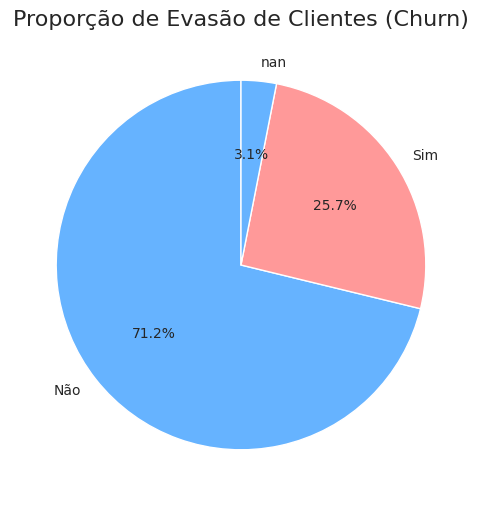

--- Gerando Gráficos: Churn por Variáveis Categóricas ---



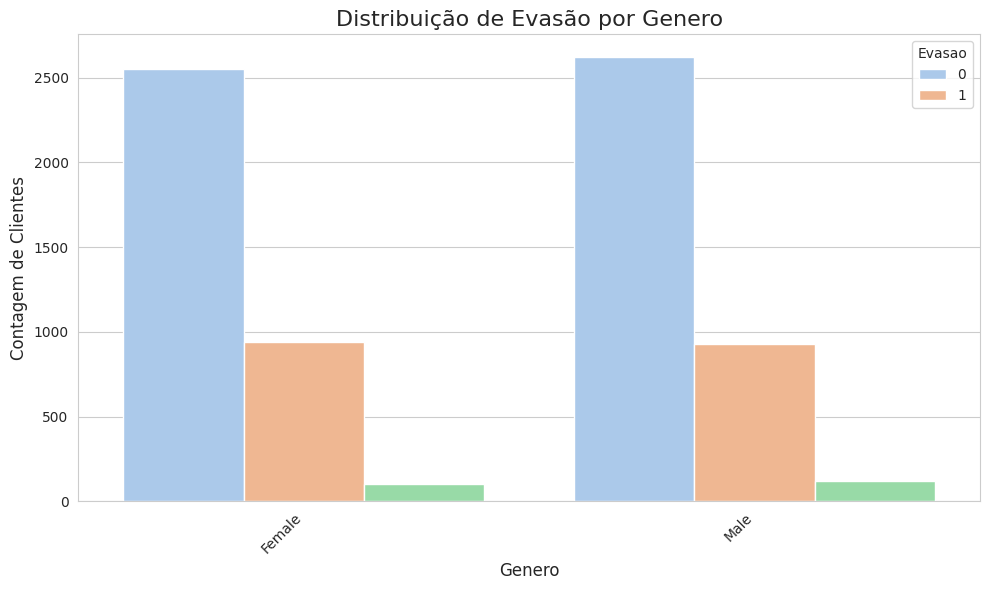

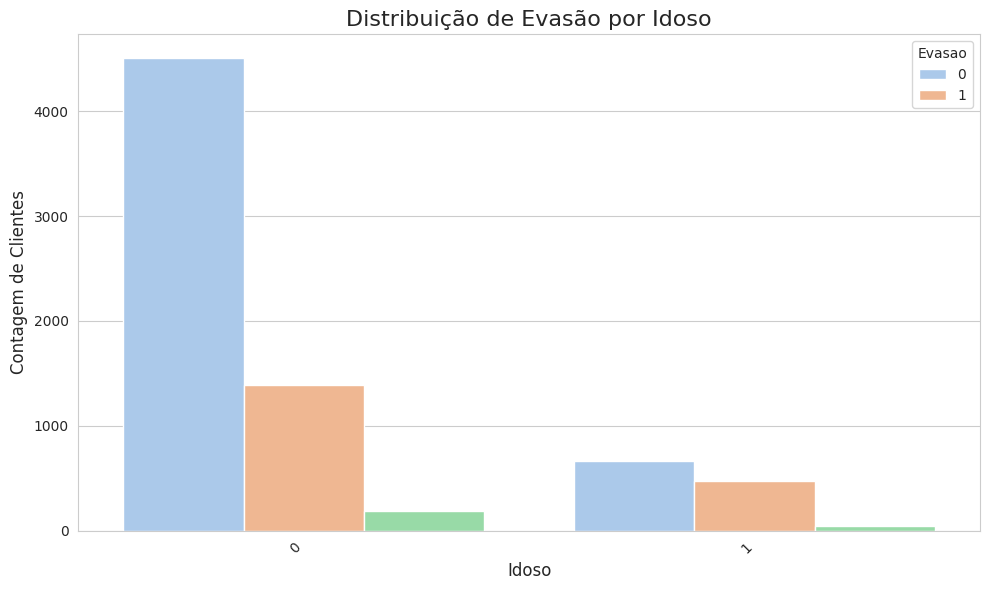

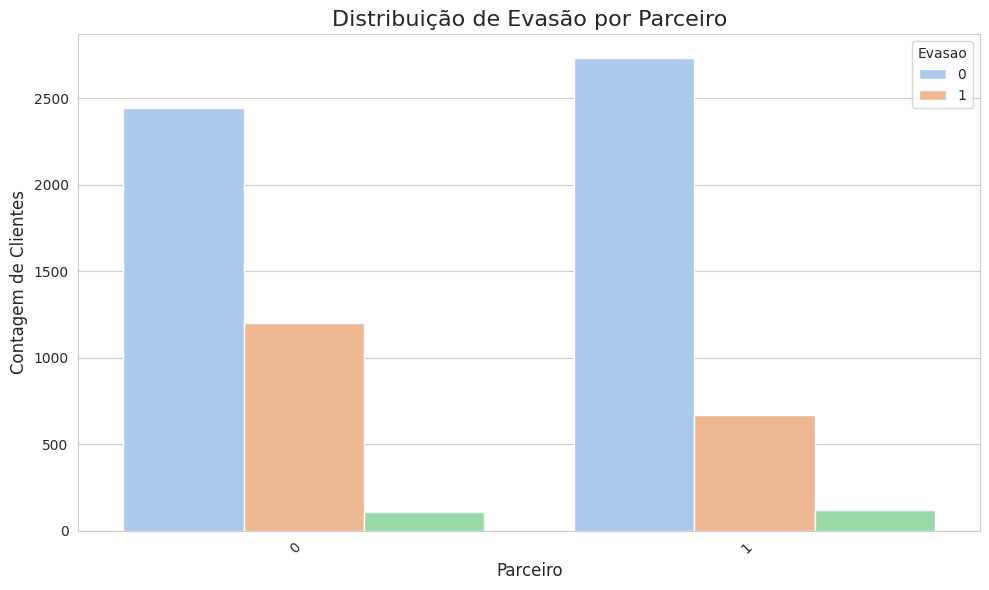

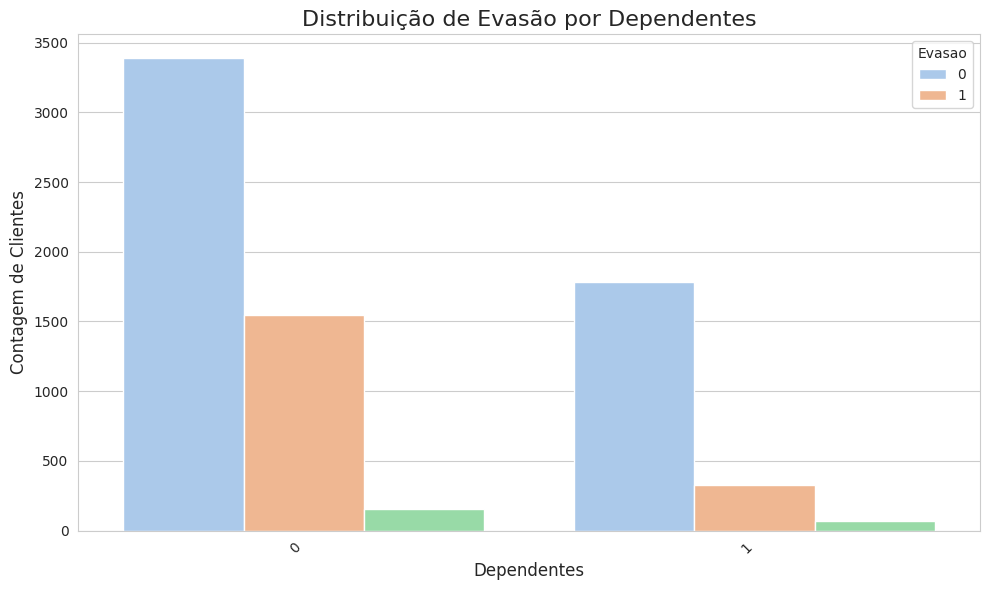

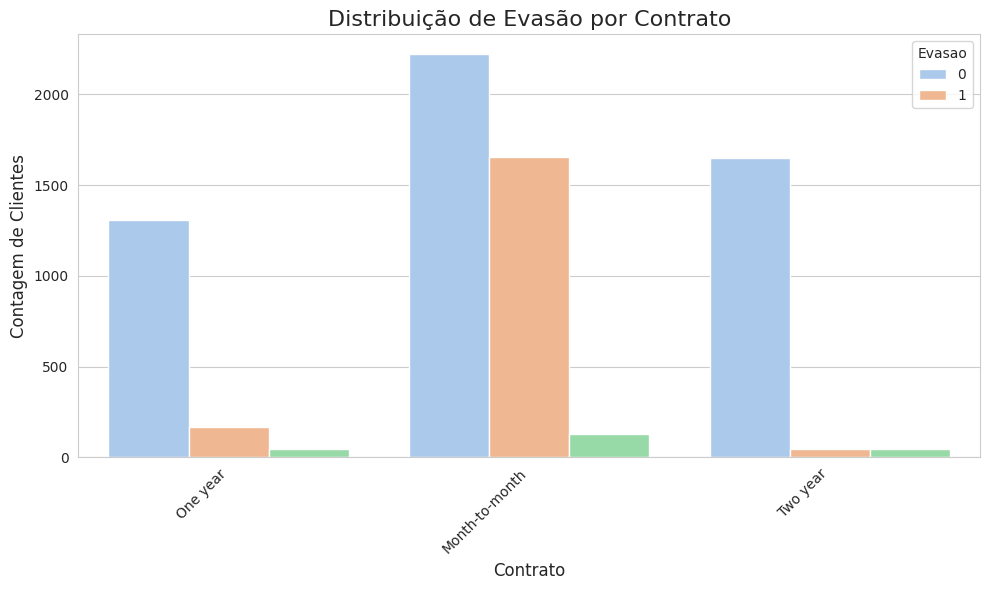

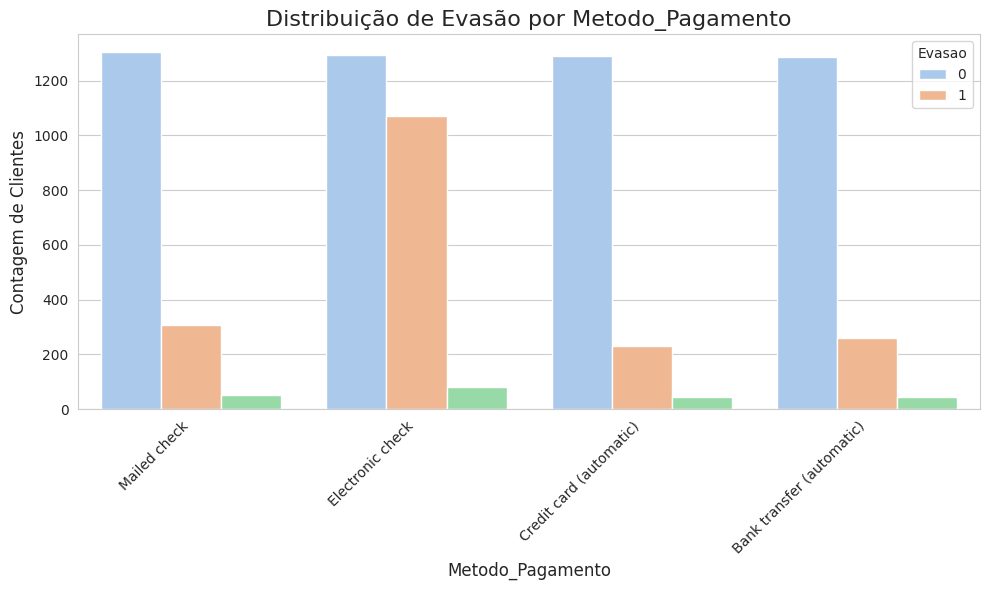

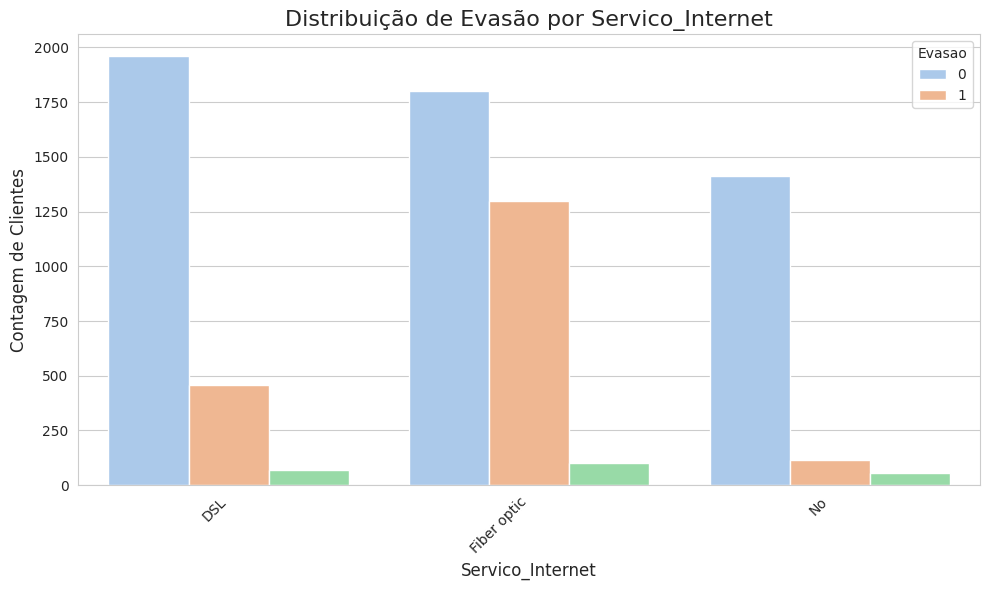

--- Gerando Gráficos: Churn por Variáveis Numéricas ---



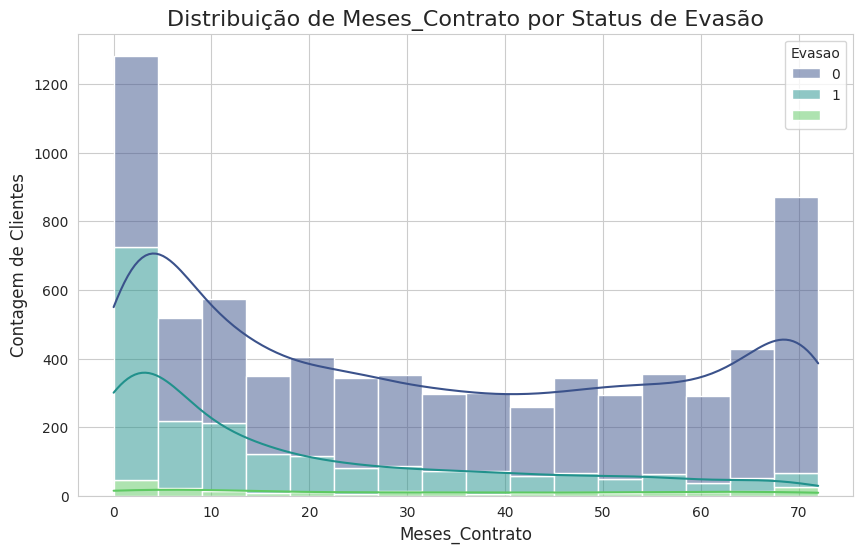

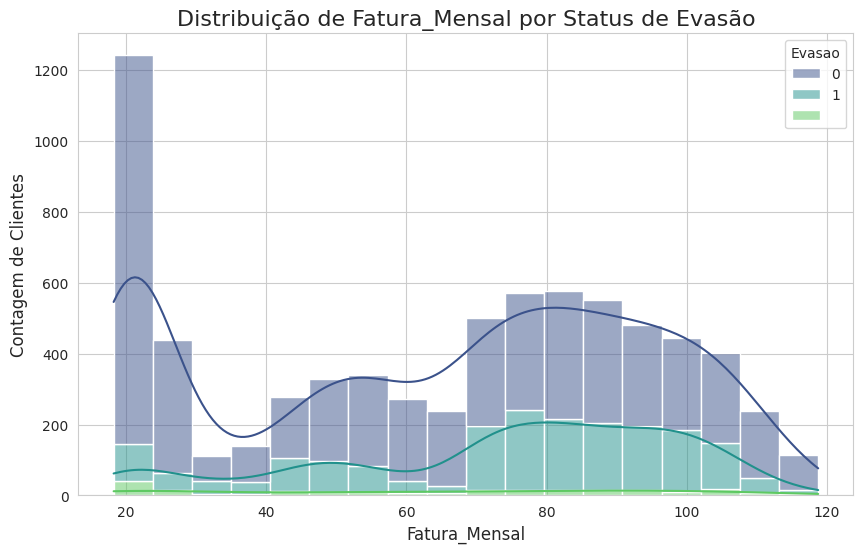

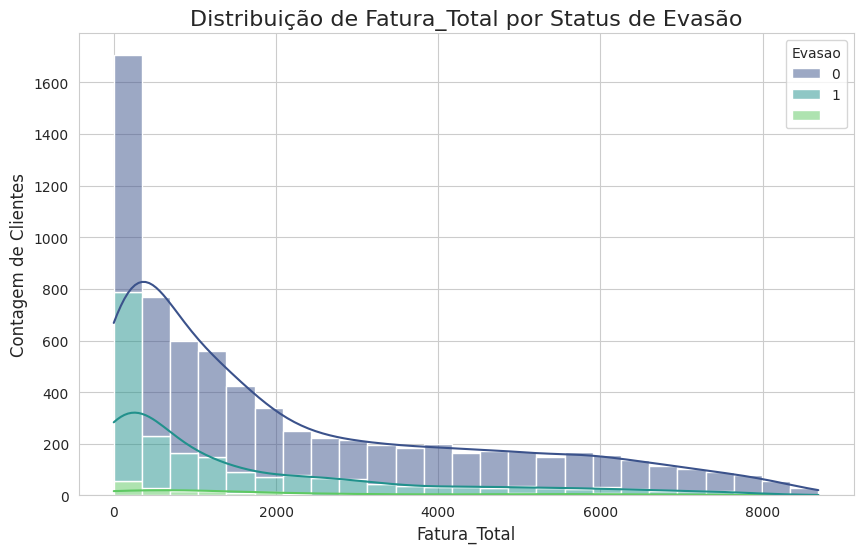

In [13]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO


url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

try:
    response = requests.get(url)
    response.raise_for_status()
    data = json.loads(response.text)
    df = pd.json_normalize(data)

    df.columns = df.columns.str.replace('customer.', '', regex=False)
    df.columns = df.columns.str.replace('phone.', '', regex=False)
    df.columns = df.columns.str.replace('internet.', '', regex=False)
    df.columns = df.columns.str.replace('account.', '', regex=False)
    df.columns = df.columns.str.replace('Charges.', '', regex=False)

    df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

    df['Total'] = df['Total'].fillna(0)

    cols_to_standardize = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols_to_standardize:
        df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

    binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
                   'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in binary_cols:
        if col in df.columns:
            df[col] = df[col].replace({'Yes': 1, 'No': 0})

    translation_dict = {
        'customerID': 'ID_Cliente', 'gender': 'Genero', 'SeniorCitizen': 'Idoso',
        'Partner': 'Parceiro', 'Dependents': 'Dependentes', 'tenure': 'Meses_Contrato',
        'PhoneService': 'Servico_Telefone', 'MultipleLines': 'Multiplas_Linhas',
        'InternetService': 'Servico_Internet', 'OnlineSecurity': 'Seguranca_Online',
        'OnlineBackup': 'Backup_Online', 'DeviceProtection': 'Protecao_Dispositivo',
        'TechSupport': 'Suporte_Tecnico', 'StreamingTV': 'Streaming_TV',
        'StreamingMovies': 'Streaming_Filmes', 'Contract': 'Contrato',
        'PaperlessBilling': 'Fatura_Digital', 'PaymentMethod': 'Metodo_Pagamento',
        'Monthly': 'Fatura_Mensal', 'Total': 'Fatura_Total', 'Churn': 'Evasao'
    }
    df.rename(columns=translation_dict, inplace=True)
    print("--- Dados Carregados e Tratados com Sucesso ---\n")


    print("--- Análise Descritiva das Variáveis Numéricas ---\n")
    print(df[['Meses_Contrato', 'Fatura_Mensal', 'Fatura_Total']].describe())
    print("\n" + "="*50 + "\n")

    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = (10, 6)

    print("--- Gerando Gráfico: Distribuição de Churn ---\n")
    plt.figure()
    churn_counts = df['Evasao'].value_counts()

    pie_labels = churn_counts.index.map({0: 'Não', 1: 'Sim'})

    plt.pie(churn_counts, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
    plt.title('Proporção de Evasão de Clientes (Churn)', fontsize=16)
    plt.ylabel('')
    plt.show()

    print("--- Gerando Gráficos: Churn por Variáveis Categóricas ---\n")
    categorical_vars = ['Genero', 'Idoso', 'Parceiro', 'Dependentes', 'Contrato', 'Metodo_Pagamento', 'Servico_Internet']
    for var in categorical_vars:
        plt.figure()
        sns.countplot(x=var, hue='Evasao', data=df, palette='pastel')
        plt.title(f'Distribuição de Evasão por {var}', fontsize=16)
        plt.xlabel(var, fontsize=12)
        plt.ylabel('Contagem de Clientes', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    print("--- Gerando Gráficos: Churn por Variáveis Numéricas ---\n")
    numerical_vars = ['Meses_Contrato', 'Fatura_Mensal', 'Fatura_Total']
    for var in numerical_vars:
        plt.figure()
        sns.histplot(data=df, x=var, hue='Evasao', multiple='stack', kde=True, palette='viridis')
        plt.title(f'Distribuição de {var} por Status de Evasão', fontsize=16)
        plt.xlabel(var, fontsize=12)
        plt.ylabel('Contagem de Clientes', fontsize=12)
        plt.show()

except Exception as e:
    print(f"Ocorreu um erro inesperado durante a análise: {e}")



#📄Relatorio Final

#Relatório Final: Análise de Evasão de Clientes - Telecom X

###INTRODUÇÃO:

Este relatório detalha a análise exploratória realizada sobre a base de clientes da Telecom X para combater um desafio crítico de negócio: a alta taxa de evasão de clientes. O objetivo central foi mergulhar nos dados para identificar os perfis, comportamentos e fatores contratuais que mais contribuem para o cancelamento de serviços. A compreensão aprofundada desses padrões é o primeiro passo para a criação de estratégias de retenção mais inteligentes e proativas, visando a sustentabilidade e o crescimento da empresa.


-

###PREPARAÇÃO DOS DADOS

A Base Para uma Análise Confiável
Para garantir a precisão dos insights, os dados brutos, obtidos via API em formato JSON, passaram por um rigoroso processo de tratamento e limpeza:

**Normalização**: A estrutura aninhada do JSON foi convertida para um formato tabular (DataFrame), essencial para a manipulação e análise dos dados.

**Limpeza de Nomes de Colunas**: Os nomes das colunas foram simplificados (ex: de 'customer.gender' para 'gender') para facilitar o acesso e a legibilidade do código.

**Tratamento de Dados Ausentes**: A coluna 'Fatura_Total' apresentava valores ausentes que, após investigação, correspondiam a clientes novos (com zero meses de contrato). Estes foram corretamente preenchidos com o valor 0.

**Padronização de Categorias**: Valores inconsistentes como 'No internet service' foram padronizados para 'No', unificando as categorias e evitando distorções na análise.

**Transformação para Formato Numérico**: Respostas binárias como 'Yes' e 'No' foram convertidas para 1 e 0, respectivamente. Essa etapa é crucial para permitir cálculos de correlação e a aplicação futura de modelos de machine learning.

**Tradução**: Por fim, todas as colunas foram renomeadas para o português, tornando o conjunto de dados mais claro e acessível para todos os stakeholders.

-

###**ANÁLISE EXPLORATÓRIA**:

A análise visual dos dados tratados revelou padrões claros e acionáveis. A taxa geral de evasão na base de clientes é de 26.5%, um número significativo que justifica uma investigação aprofundada.

**Análise por Tipo de Contrato:**

Achado: Clientes com contrato 'Mês a mês' são, de longe, os que mais cancelam. A taxa de churn neste grupo é drasticamente maior do que nos grupos de 'Um ano' ou 'Dois anos'.

Por que isso importa? A ausência de um compromisso de longo prazo torna a decisão de sair muito mais fácil. Este é o grupo de maior vulnerabilidade e que exige atenção imediata.

**Análise por Tempo de Contrato (Fidelidade):**

Achado: Existe uma correlação inversa forte entre o tempo de contrato (Meses_Contrato) e a evasão. Clientes com poucos meses de casa são os mais propensos a cancelar.

Por que isso importa? Os primeiros meses são críticos para a retenção. Uma experiência inicial ruim ou a falta de percepção de valor levam ao churn precoce.

**Análise por Fatura Mensal:**

Achado: A evasão se concentra em clientes com faturas mensais mais altas, especialmente na faixa de $70 a $100.

Por que isso importa? Clientes que pagam mais são mais sensíveis a preço e esperam um serviço de maior qualidade. A combinação de preço alto com o serviço de 'Fibra Óptica' (que também tem alto churn) sugere que a percepção de custo-benefício pode estar baixa.

**Análise por Método de Pagamento:**

Achado: O pagamento via 'Cheque eletrônico' está associado a uma taxa de churn muito superior aos métodos automatizados como débito automático e cartão de crédito.

Por que isso importa? Métodos de pagamento que exigem uma ação manual do cliente a cada mês criam um ponto de fricção e uma oportunidade mensal para ele reconsiderar o serviço.

**Análise por Serviço de Internet:**

Achado: Clientes com serviço de 'Fibra óptica' cancelam mais do que aqueles com 'DSL'.

Por que isso importa? Sendo um serviço premium e geralmente mais caro, a alta taxa de churn pode indicar problemas de instabilidade na entrega, falhas no suporte técnico ou um preço percebido como injusto frente à qualidade entregue.


-

###**CONCLUSÕES:**

A análise nos permite construir uma persona clara do cliente com maior probabilidade de evasão:

É um cliente novo (com poucos meses de contrato), que optou por um plano de Fibra Óptica com um valor mensal elevado. Ele possui um contrato flexível 'Mês a mês' e realiza o pagamento mensalmente através de cheque eletrônico, o que o força a reavaliar o serviço a cada fatura.

Em contrapartida, os fatores mais fortes de retenção são os contratos de longo prazo e a fidelidade (maior tempo de casa).

-


###**RECOMENDAÇÕES ESTRATÉGICAS E PRÓXIMOS PASSOS**

Com base nos insights, recomendamos as seguintes ações estratégicas:

**Blindar o Início da Jornada do Cliente:**

Ação: Desenvolver um programa de onboarding robusto para clientes nos primeiros 3 meses.

Próximos Passos: Criar um fluxo de comunicação (e-mails, SMS) com dicas de uso, verificar a qualidade da instalação e realizar uma pesquisa de satisfação proativa no primeiro mês.

**Converter Contratos de Curto Prazo:**

Ação: Criar campanhas agressivas para migração de contratos 'Mês a mês' para planos anuais.

Próximos Passos: Oferecer descontos progressivos, um upgrade de serviço ou meses de gratuidade como incentivo para a fidelização por 12 ou 24 meses.

**Auditoria do Serviço de Fibra Óptica:**

Ação: Realizar uma investigação aprofundada sobre a qualidade e o suporte do serviço de Fibra.

Próximos Passos: Cruzar os dados de churn com registros de chamadas de suporte técnico e reclamações para identificar se há problemas recorrentes de instabilidade, velocidade ou atendimento para este serviço.

**Reduzir Fricção no Pagamento:**

Ação: Incentivar a migração de 'Cheque eletrônico' para métodos de pagamento automáticos.

Próximos Passos: Oferecer um pequeno desconto na fatura (ex: 5%) para clientes que cadastrarem o pagamento em débito automático ou cartão de crédito.